### Example 1: KMeans on digits

• To start, let's take a look at applying k-means on the same simple digits data that we saw in In-Depth: Decision Trees and Random Forests and In Depth: Principal Component Analysis.

• Here we will attempt to use k-means to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

• We will start by loading the digits and then finding the KMeans clusters.

• Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

• We begin with the standard imports:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%matplotlib inline

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

• The clustering can be performed as we did before:

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

• The result is 10 clusters in 64 dimensions.

• Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.

• Let's see what these cluster centers look like:

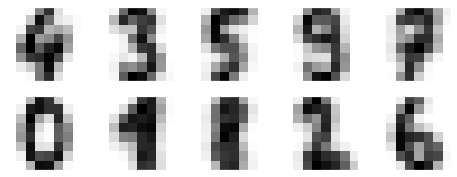

In [11]:
fig , ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary);

• We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

• Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted.

• We can fix this by matching each learned cluster label with the true labels found in them:

In [12]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

• Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

• With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits! Let's check the confusion matrix for this:

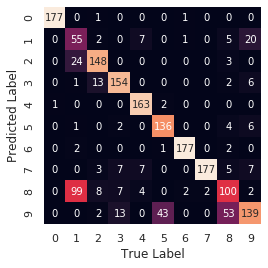

In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

• As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones.

• But this still shows that using k-means, we can essentially build a digit classifier without reference to any known labels!

• Just for fun, let's try to push this even farther.

• We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm (mentioned in In-Depth: Manifold Learning) to pre-process the data before performing k-means.

• t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

• Let's see how it does:

In [18]:
from sklearn.manifold import TSNE

# Project the data: This step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    #labels[mask] = mode(digits.target[mask])[0]
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

• That's nearly 92% classification accuracy without using the labels.

• This is the power of unsupervised learning when used carefully: it can extract information from the dataset that it might be difficult to do by hand or by eye.